# 20/05/13 - Estudos de redes com até duas camadas e de 4 a 32 neurônios e peso na perda da condição inicial e dados



## Resumo

- Função de perda: RMSE
- Parânmetros do modelo: k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0
- Funções de  ativação: 
    - LeakyReLU
    - Sigmoid
    - Elu 
    - Tanh
    - ReLU
    - SiLU

- Tamanhos de batelada e épocas:
    - (10000, 500)
    - (5000, 1000)

- Arquivo de checkpoint: 1716221142

- Peso da perda de cond. inicial: 10

- Peso da perda de dados: 10

In [2]:
import glob
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
result_list = glob.glob("edo_pinn_sim/*")

print("numero de arquiteturas testadas: {}".format(len(result_list)))

numero de arquiteturas testadas: 67


In [4]:
results_dict = {}

error_list = []

speed_list = []
tmp_list = []

for file in result_list:
    i = len(error_list)
    if file.split(".")[-1] == "pkl":
        with open(file, "rb") as f:
            results_dict[i] = pk.load(f)

        results_dict[i]["arch_name"] = file.split("/")[-1].split(".")[0]

        tmp_list.append(results_dict[i]["max_ae"])
        error_list.append(results_dict[i]["rmse"])
        speed_list.append(
            results_dict[i]["mean_speed_up"] - results_dict[i]["std_speed_up"]
        )

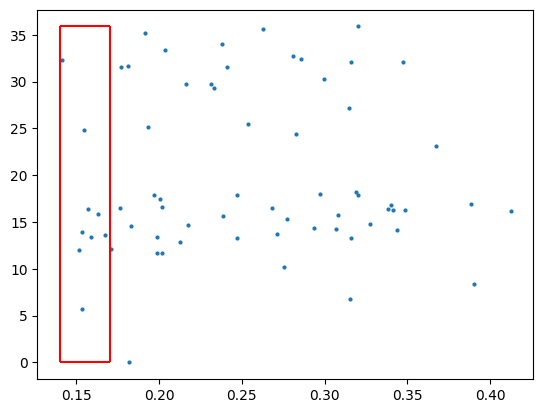

In [5]:
plt.scatter(error_list, speed_list, s=4)
plt.hlines(max(speed_list), 0.14, 0.17, color="r")
plt.hlines(min(speed_list), 0.14, 0.17, color="r")
plt.vlines(0.17, min(speed_list), max(speed_list), color="r")
plt.vlines(0.14, min(speed_list), max(speed_list), color="r")
plt.show()

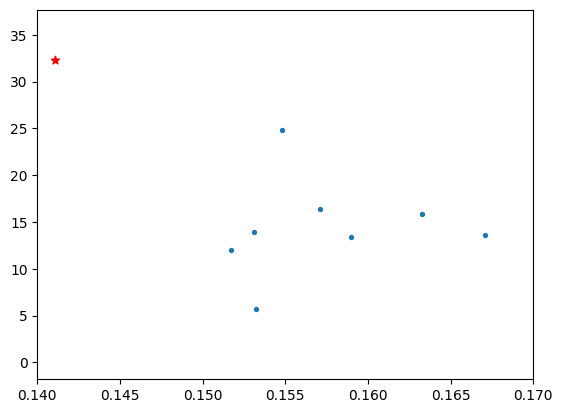

Arquitetura escolhida: epochs_500__batch_10000__arch_SiLU--8__


In [7]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 30), np.argwhere(np.array(error_list) < 0.155)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.14, 0.17)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

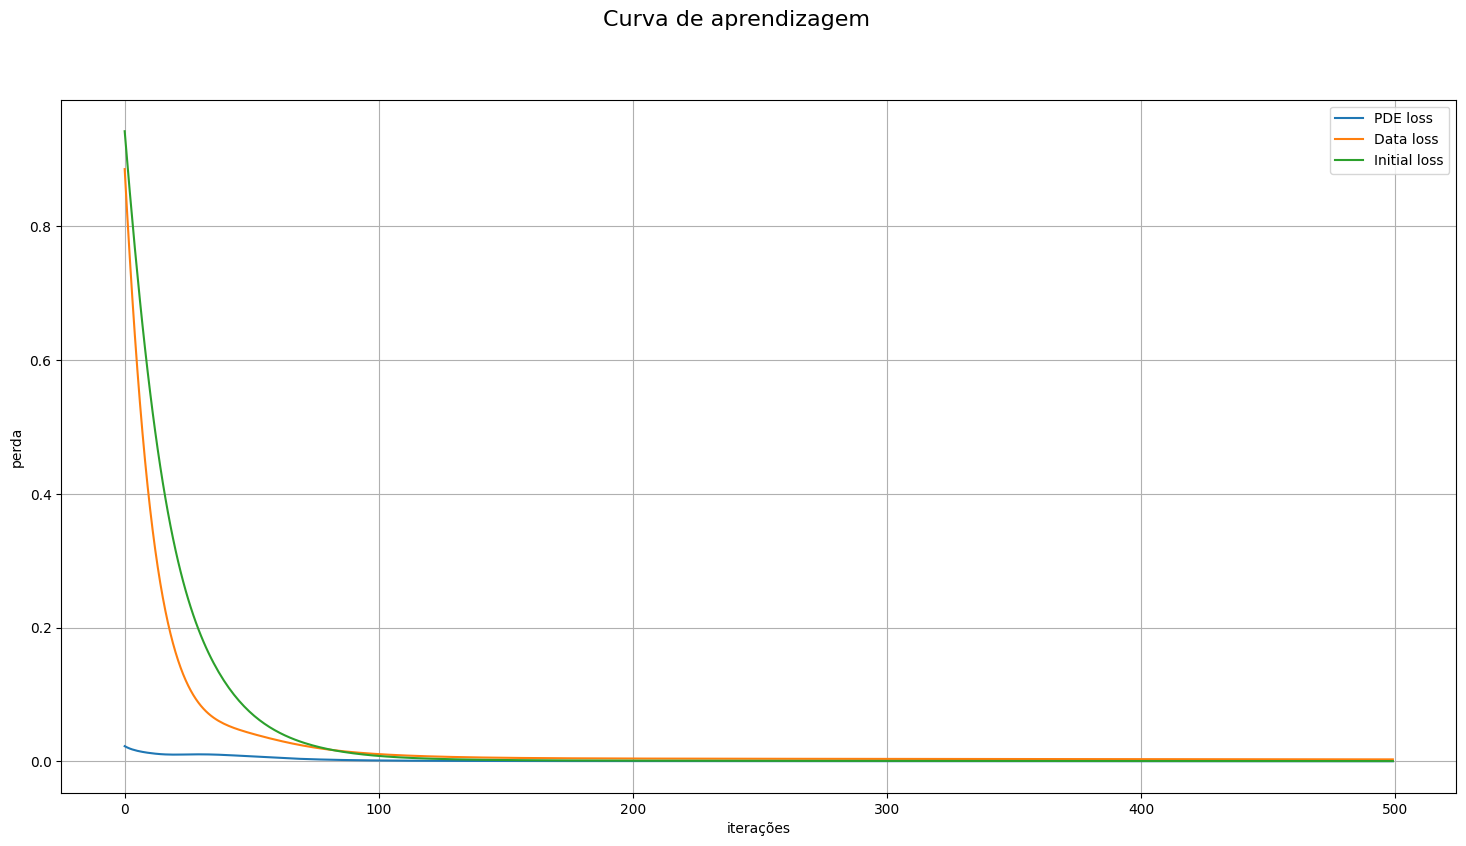

In [14]:
with open("learning_curves/C_pde_loss_it__" + arch_str + ".pkl", "rb") as f:
    C_pde_loss_it = pk.load(f)

with open("learning_curves/C_data_loss_it__" + arch_str + ".pkl", "rb") as f:
    C_data_loss_it = pk.load(f)

with open("learning_curves/C_initial_loss_it__" + arch_str + ".pkl", "rb") as f:
    C_initial_loss_it = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Curva de aprendizagem", fontsize=16)

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("iterações")
ax.set_ylabel("perda")
ax.plot(
    range(len(C_pde_loss_it)),
    C_pde_loss_it,
    label="PDE loss",
)
ax.plot(
    range(len(C_data_loss_it)),
    C_data_loss_it,
    label="Data loss",
)
ax.plot(
    range(len(C_initial_loss_it)),
    C_initial_loss_it,
    label="Initial loss",
)
# ax.set_yscale("log")
ax.grid()
ax.legend()

plt.show()

In [15]:
Cl_pinn_np = Cl_pinn.detach().numpy().reshape(size_t + 1, size_t + 1)
Cp_pinn_np = Cp_pinn.detach().numpy().reshape(size_t + 1, size_t + 1)

fig = plt.figure(figsize=[18, 18])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)

vmin = 0
vmax = np.max(
    [
        np.max(Cp_pinn.cpu().numpy()),
        np.max(Cl_pinn.cpu().numpy()),
        np.max(Cp_old),
        np.max(Cl_old),
    ]
)

# Plotango 3D
ax = fig.add_subplot(2, 2, 1)

contour = ax.contourf(
    tt,
    ll,
    Cp_pinn_np,
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. de bactérias")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")
colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

# Plotando 2D

ax = fig.add_subplot(2, 2, 2)

contour = ax.contourf(
    tt,
    ll,
    Cl_pinn_np,
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. de neutrófilos")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")

colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

# Plotango 3D
ax = fig.add_subplot(2, 2, 3)

contour = ax.contourf(
    tt,
    ll,
    Cp_old.reshape(size_t + 1, size_t + 1),
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. real de bactérias")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")
colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

# Plotando 2D

ax = fig.add_subplot(2, 2, 4)

contour = ax.contourf(
    tt,
    ll,
    Cl_old.reshape(size_t + 1, size_t + 1),
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. real de neutrófilos")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")

colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'edo_fdm_sim/Cp__k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0.pkl'

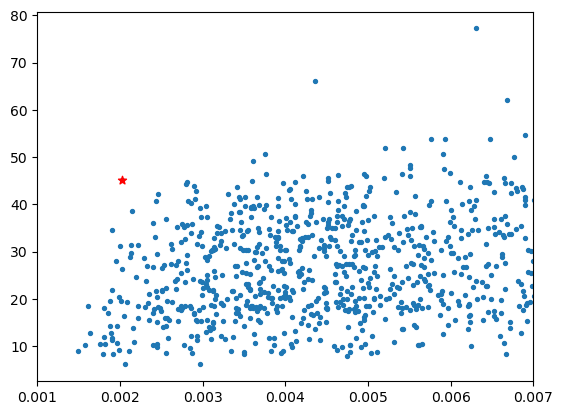

Arquitetura escolhida: epochs_500__batch_10000__arch_SiLU--8__LeakyReLU--4__


In [ ]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 43), np.argwhere(np.array(error_list) < 0.0022)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.001, 0.007)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

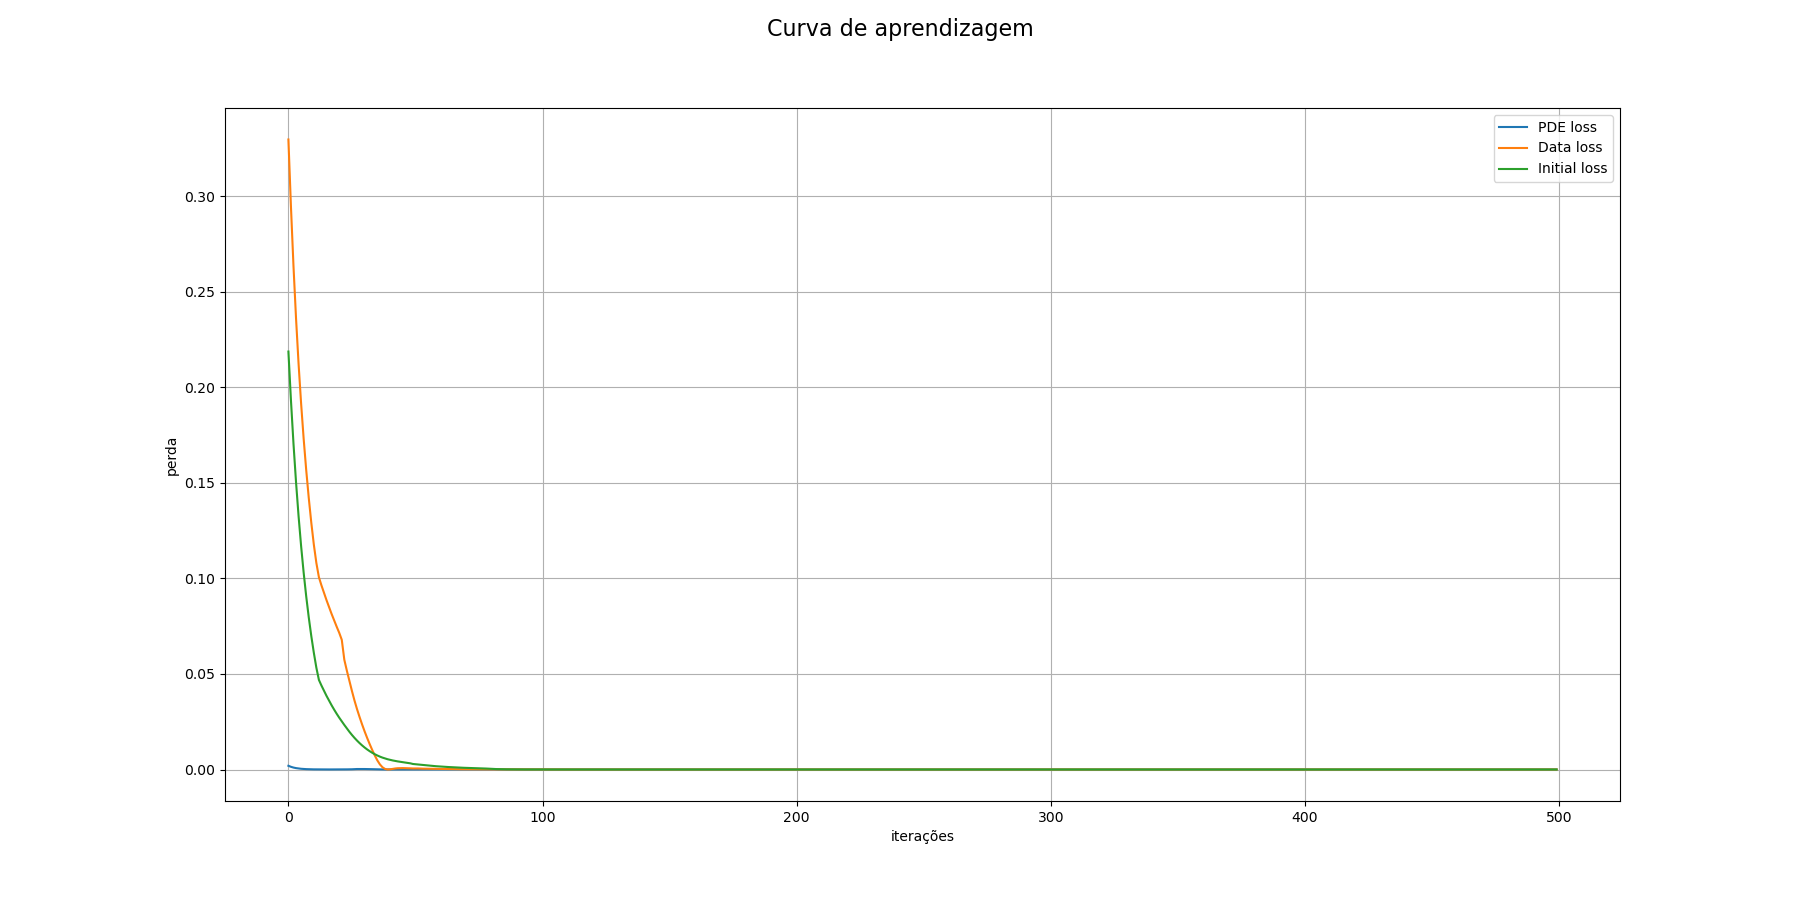

In [ ]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

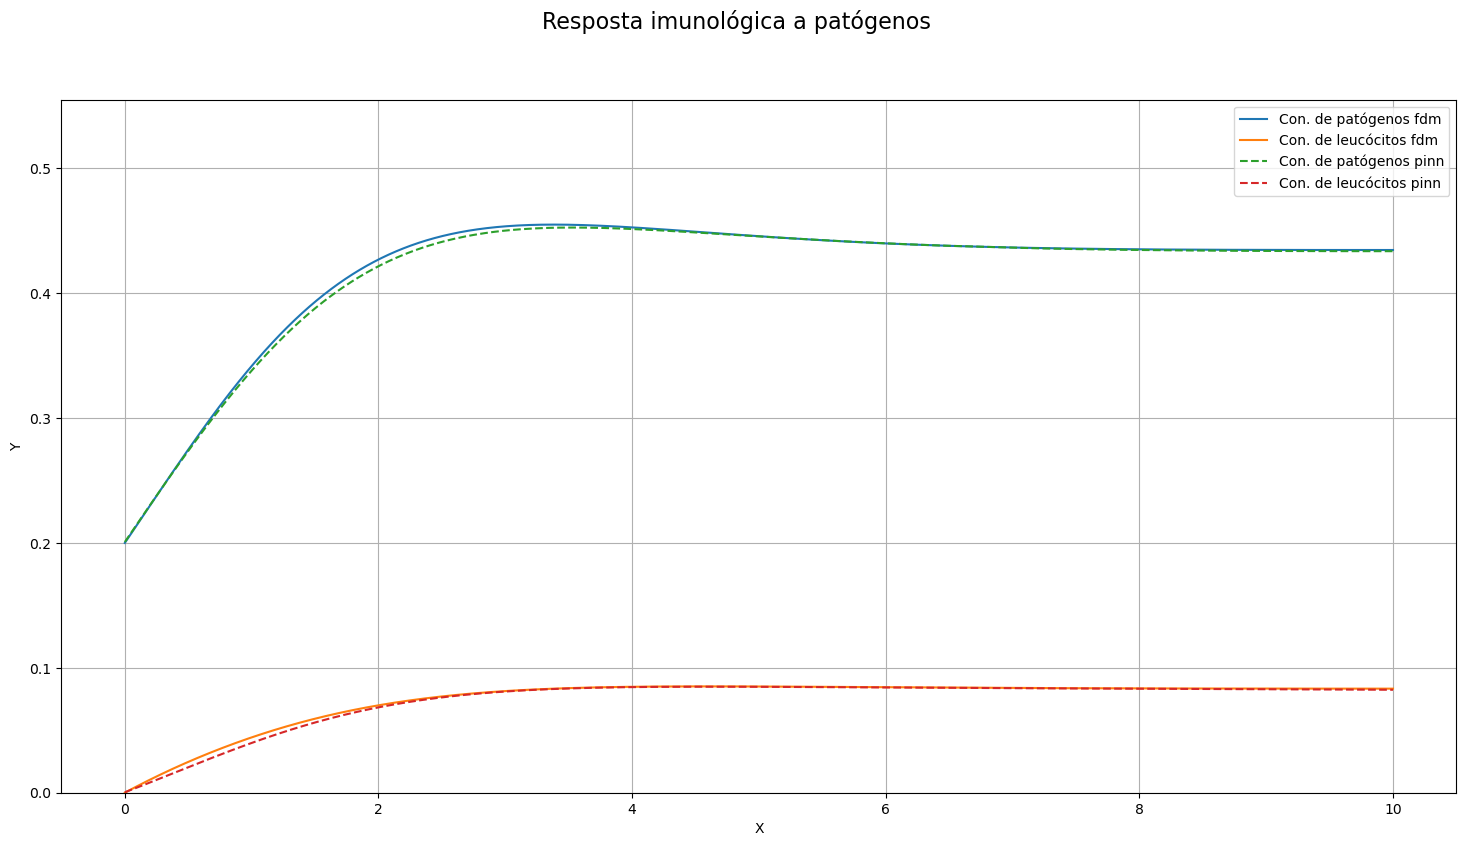

Speed Up: 46.395262507635955 +/-1.3004057028801246


In [ ]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

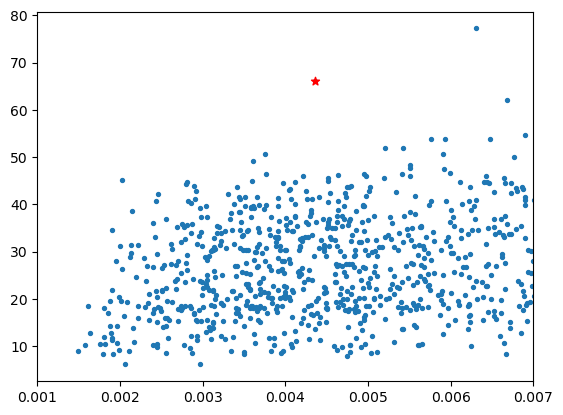

Arquitetura escolhida: epochs_500__batch_10000__arch_Sigmoid--8__


In [ ]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 60), np.argwhere(np.array(error_list) < 0.005)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.001, 0.007)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

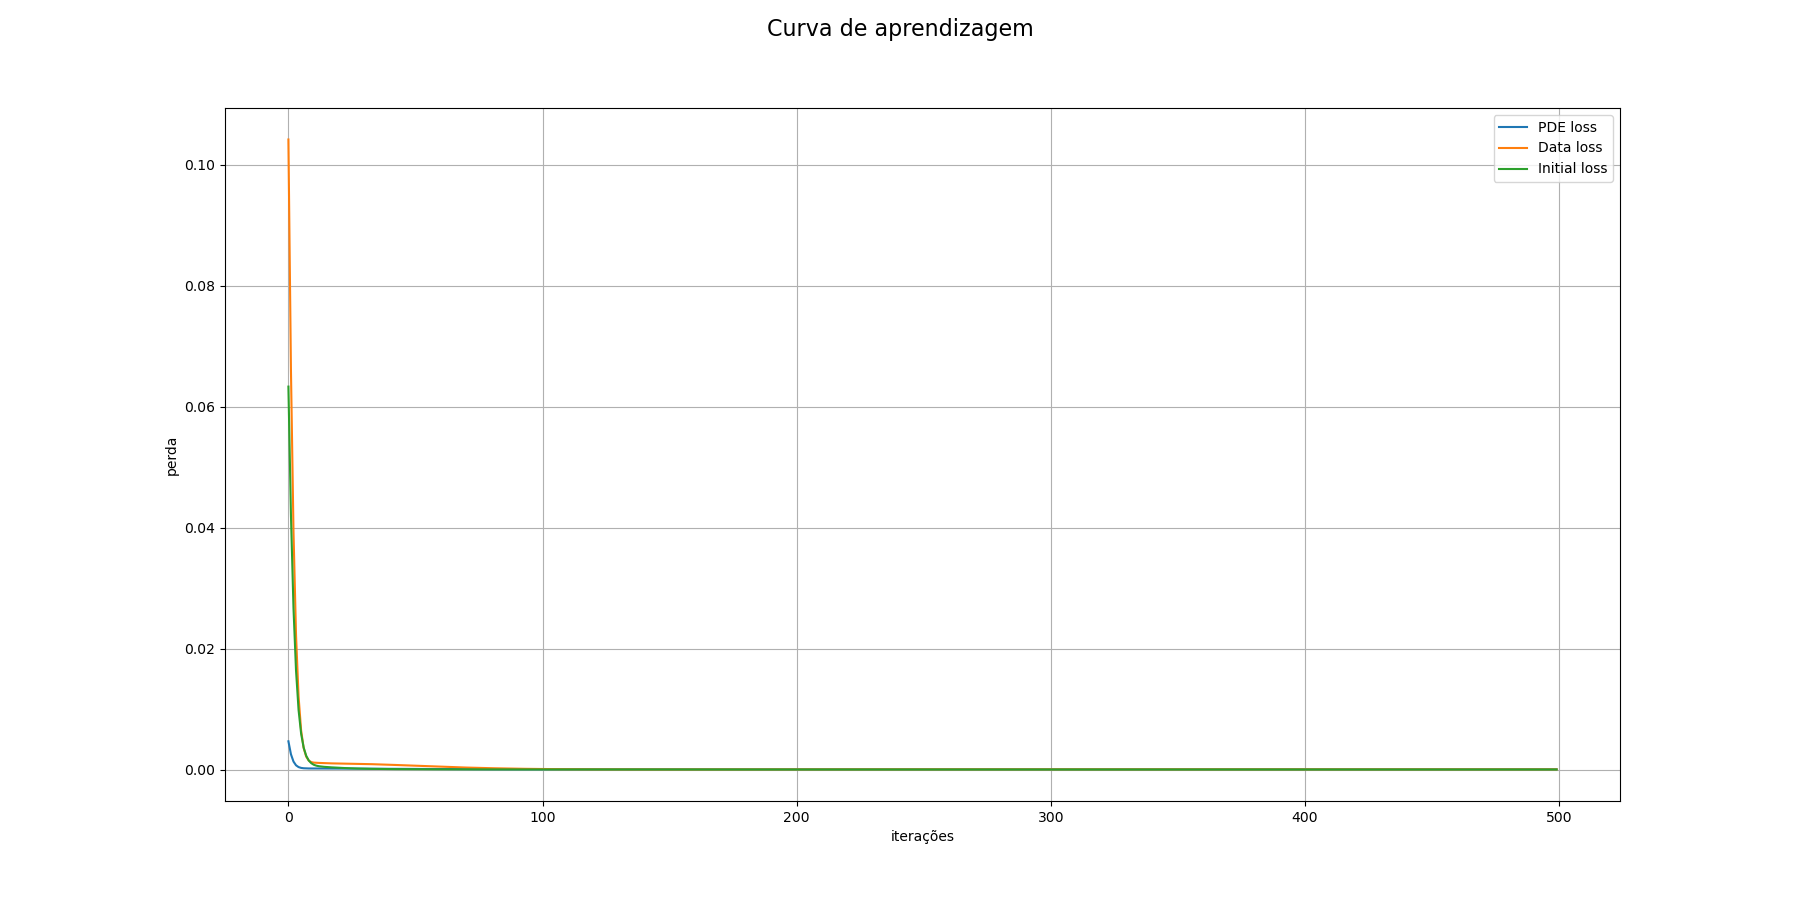

In [ ]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

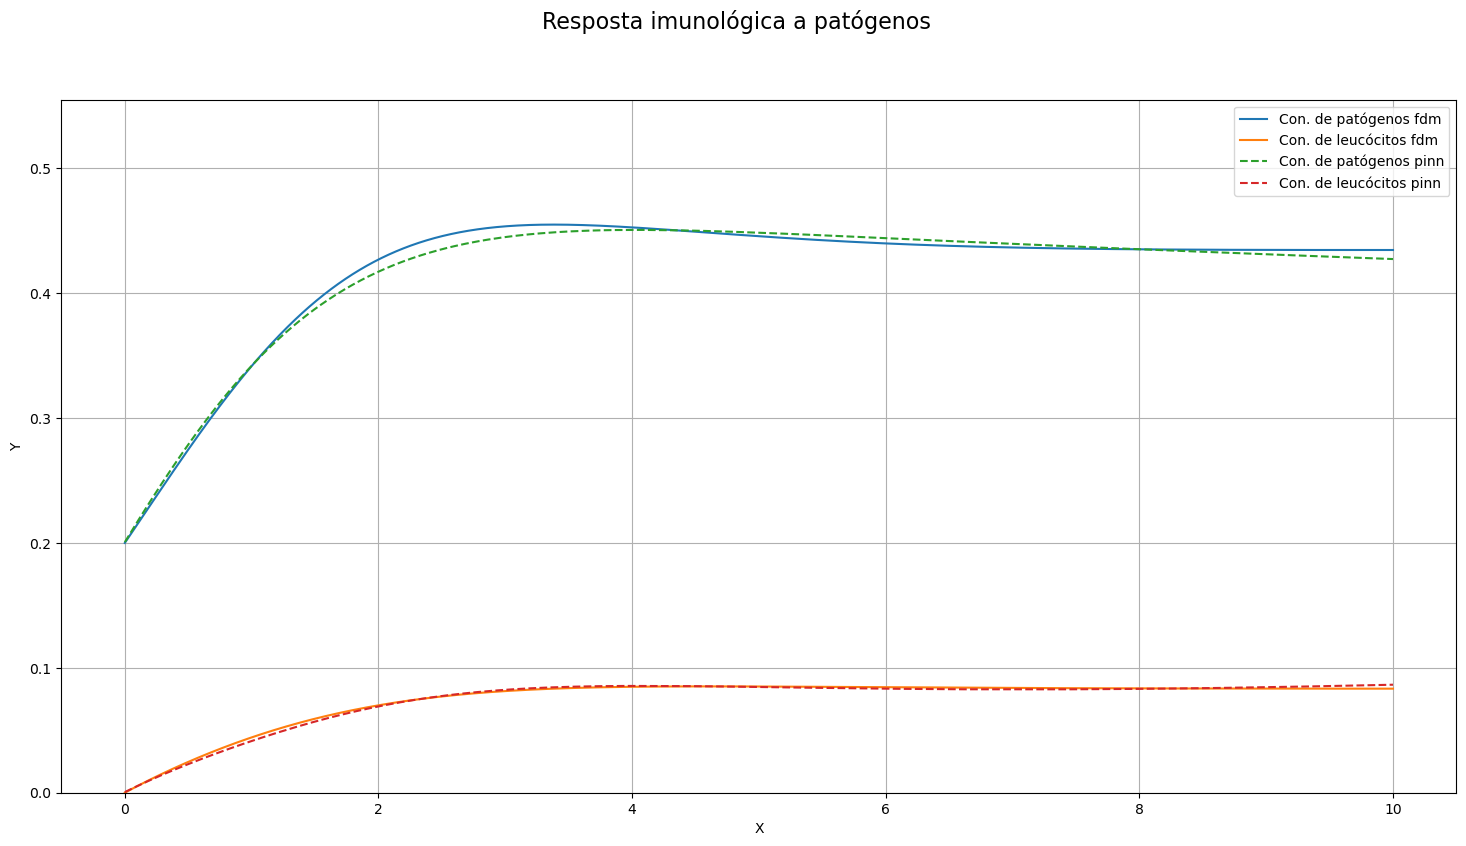

Speed Up: 71.72902047527438 +/-5.64650880588659


In [ ]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

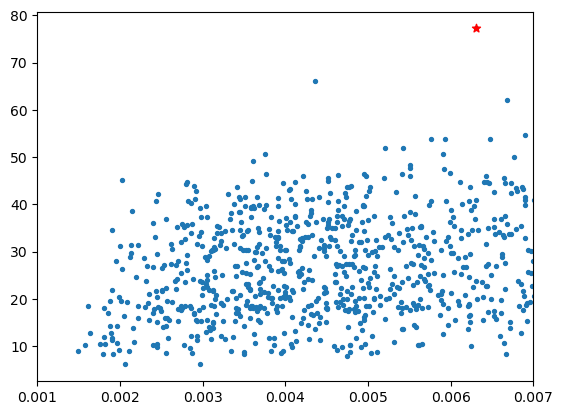

Arquitetura escolhida: epochs_500__batch_10000__arch_Sigmoid--4__


In [ ]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 70), np.argwhere(np.array(error_list) < 0.007)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.001, 0.007)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

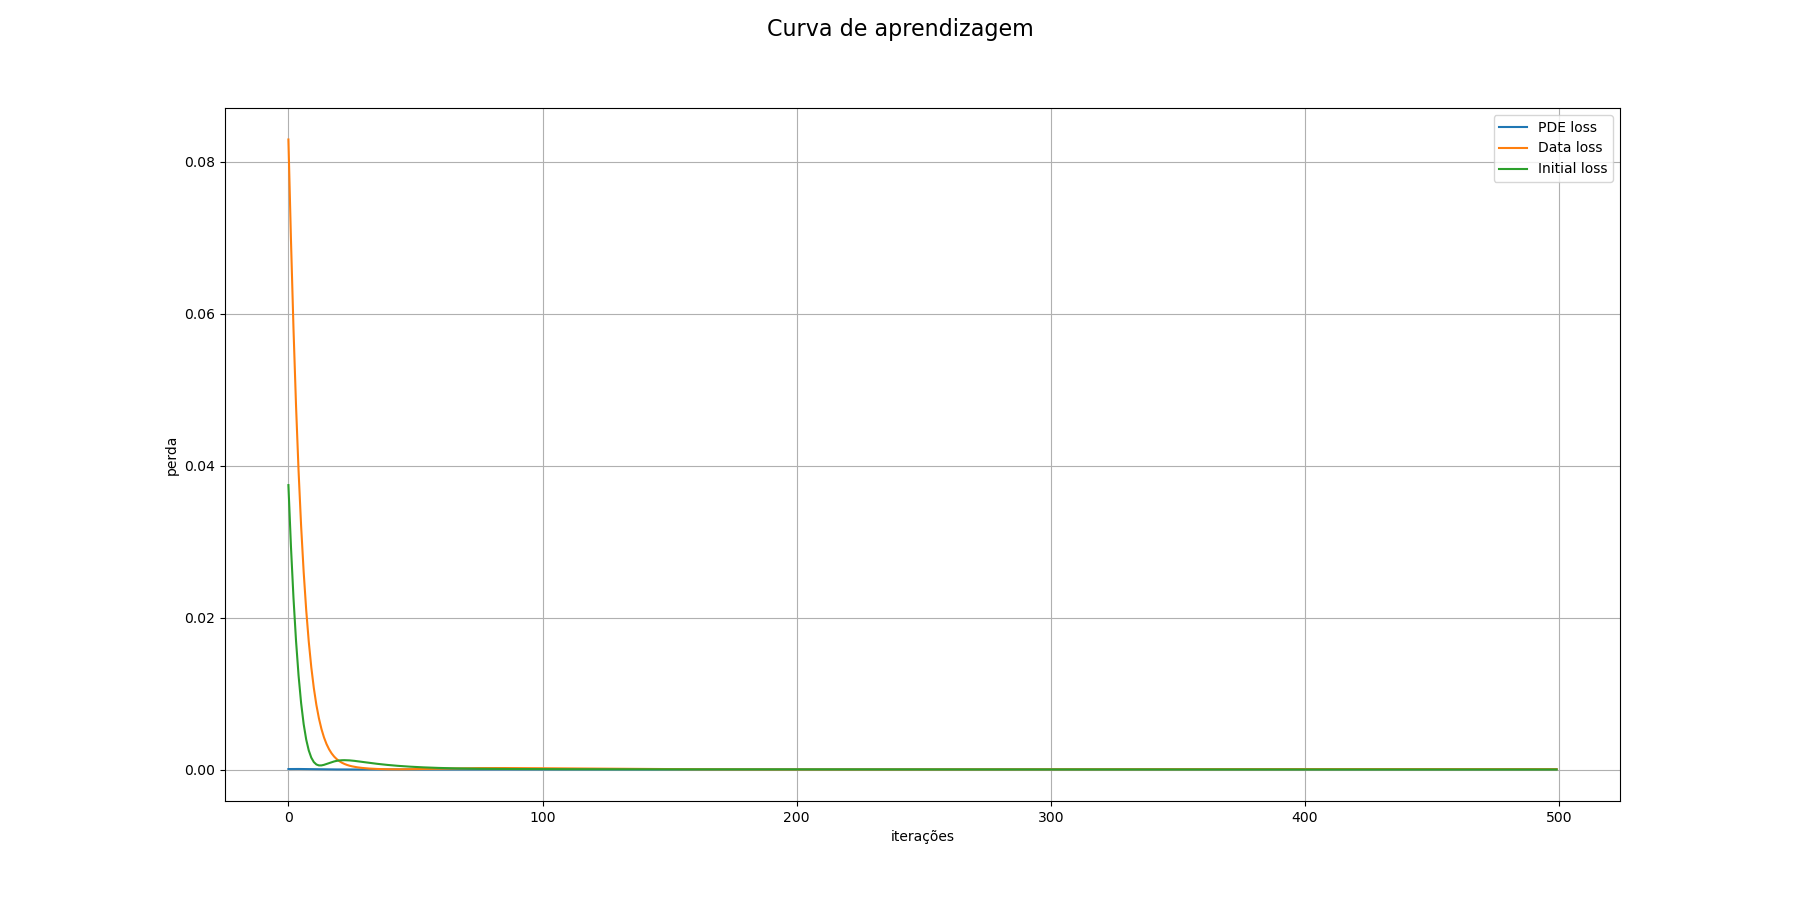

In [ ]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

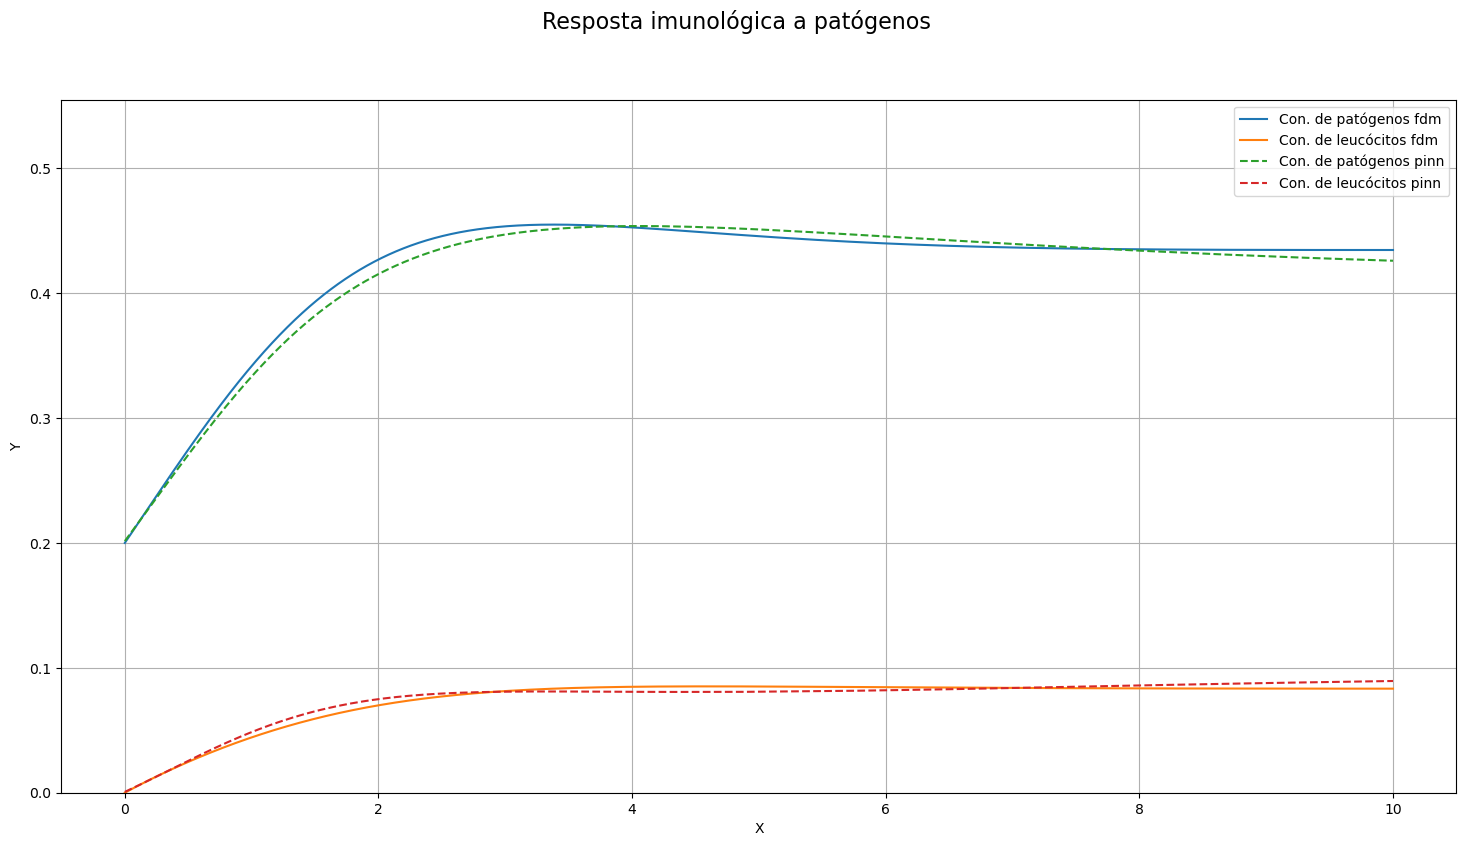

Speed Up: 87.50210925984241 +/-10.297432714839077


In [ ]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)